In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("house.csv")
df.columns=['CRIM','ZN','INDUS','CHAS','NDX','RM','AGE','DIS','RAD','TAX','PTRATID','BSA','LASTH','MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NDX,RM,AGE,DIS,RAD,TAX,PTRATID,BSA,LASTH,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [4]:
X=df[['RM']].values
y=df[['MEDV']].values

In [5]:
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import LinearRegression
ransac=RANSACRegressor(LinearRegression(),
                      max_trials=100,
                      min_samples=50,
                      loss='absolute_loss',
                      residual_threshold=5.0,random_state=0)

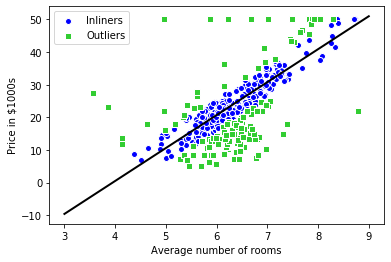

In [7]:
ransac.fit(X,y)
inliner_mask=ransac.inlier_mask_
outlier_mask=np.logical_not(inliner_mask)
line_X=np.arange(3,10,1)
line_y_ransac=ransac.predict(line_X[:,np.newaxis])
plt.scatter(X[inliner_mask],y[inliner_mask],c='blue',
           edgecolor='white',marker='o',label='Inliners')
plt.scatter(X[outlier_mask],y[outlier_mask],c='limegreen',
          edgecolor='white',marker='s',label='Outliers')
plt.plot(line_X,line_y_ransac,color='black',lw=2)
plt.xlabel('Average number of rooms')
plt.ylabel('Price in $1000s')
plt.legend(loc='upper left')
plt.show()

In [22]:
print('Slope: %.3f'%ransac.estimator_.coef_[0])
print('Intercept: %.3f'%ransac.estimator_.intercept_)

Slope: 10.099
Intercept: -39.915
